### 추측 통계

In [1]:
# 모집단과 표본
# 표본의 추출방법

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('../통계/data/ch4_scores400.csv')
df = pd.read_csv('../4.통계/data/ch4_scores400.csv')

scores = np.array(df.score)
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [2]:
np.random.choice([1, 2, 3], 3, replace = False) # 중복 방지

array([1, 3, 2])

In [3]:
data = np.array([1, 2, 3, 4, 5])

p = [0.1, 0.2, 0.4, 0.2, 0.1]

sample = np.random.choice(data, size = 10, replace = True, p = p) # p 는 선택될 확률 지정

print(sample)

[3 3 3 4 2 5 3 3 5 2]


In [4]:
np.random.seed(0)

sample = np.random.choice(scores, 20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [5]:
sample.mean()

70.4

In [6]:
scores.mean()

69.53

In [7]:
for i in range(5) :
    sample = np.random.choice(scores, 20)
    print(sample)
    print(f'{i + 1}번째 무작위 추출로 얻은 표본 평균', sample.mean(), '\n')

[56 55 79 91 86 79 83 55 85 76 81 57 77 99 61 57 81 73 59 59]
1번째 무작위 추출로 얻은 표본 평균 72.45 

[80 50 85 86 85 59 72 58 31 60 56 64 49 88 66 63 63 47 67 45]
2번째 무작위 추출로 얻은 표본 평균 63.7 

[31 55 77 61 54 57 72 46 52 76 92 63 63 80 94 70 76 61 80 61]
3번째 무작위 추출로 얻은 표본 평균 66.05 

[47 60 65 86 65 74 76 60 85 78 73 70 68 86 58 74 67 67 83 92]
4번째 무작위 추출로 얻은 표본 평균 71.7 

[54 73 92 81 87 56 96 57 93 67 90 54 90 75 46 80 63 57 78 94]
5번째 무작위 추출로 얻은 표본 평균 74.15 



In [8]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1 / 21, 2 / 21, 3 / 21, 4 / 21, 5 / 21, 6 / 21]

np.random.seed(1)
num_trial = 100

sample = np.random.choice(dice, num_trial, p = prob)

sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [9]:
freq, _ = np.histogram(sample, bins = 6, range = (1, 7))

print(freq, '\n')

rdf = pd.DataFrame({'frequency' : freq, 
                    'relative frequency' : freq / num_trial},
                   index = pd.Index(np.arange(1, 7), name = 'dice'))

rdf

[ 6 12 12 20 24 26] 



,frequency,relative frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


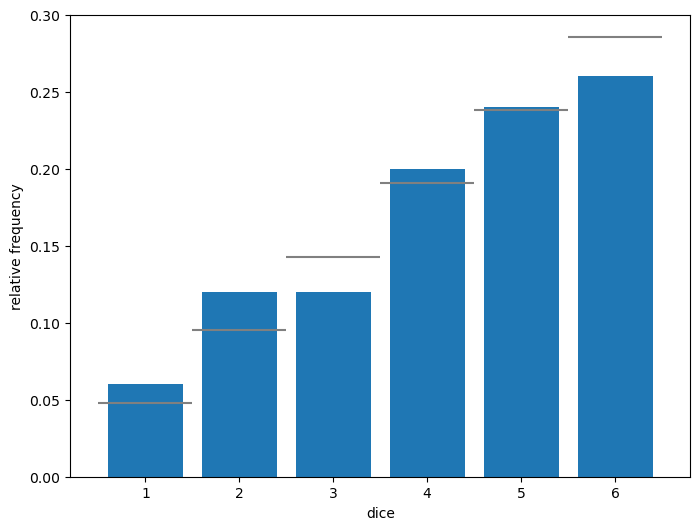

In [10]:
np.linspace(1.5, 6.5, 6)

np.random.seed(1)
num_trial = 100
sample = np.random.choice(dice, num_trial, p = prob)

plt.figure(figsize = (8, 6))

plt.hist(sample, bins = 6, range = (1, 7), density = True, rwidth = 0.8)
plt.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors = 'gray')
plt.xticks(np.linspace(1.5, 6.5, 6), np.arange(1,7))
plt.xlabel('dice')
plt.ylabel('relative frequency')

plt.show()

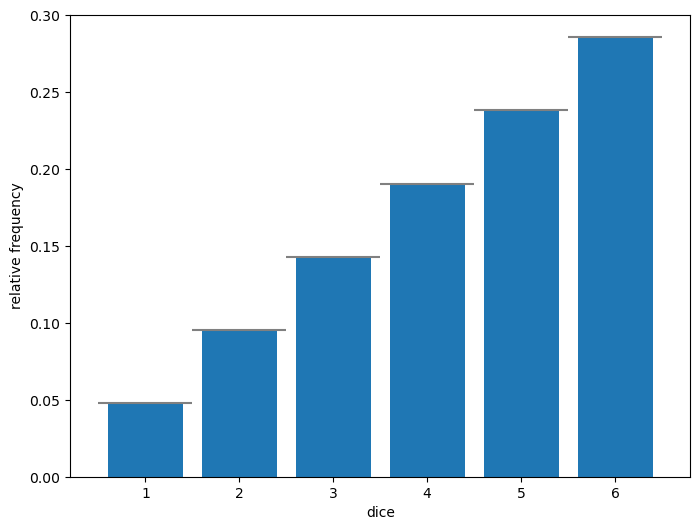

In [11]:
np.linspace(1.5, 6.5, 6)

np.random.seed(1)
num_trial = 10000000
sample = np.random.choice(dice, num_trial, p = prob)

plt.figure(figsize = (8, 6))

plt.hist(sample, bins = 6, range = (1, 7), density = True, rwidth = 0.8)
plt.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors = 'gray')
plt.xticks(np.linspace(1.5, 6.5, 6), np.arange(1,7))
plt.xlabel('dice')
plt.ylabel('relative frequency')

plt.show()

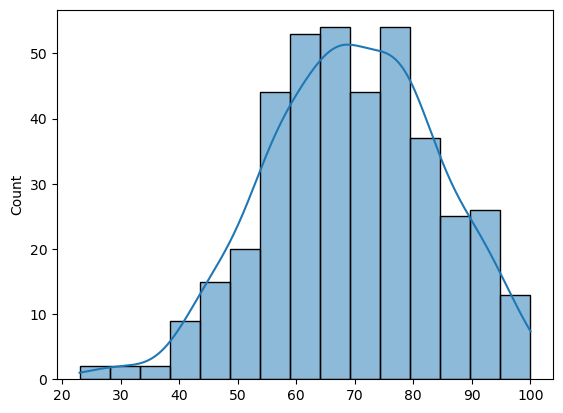

In [12]:
# df = pd.read_csv('../통계/data/ch4_scores400.csv')
df = pd.read_csv('../4.통계/data/ch4_scores400.csv')

scores = np.array(df.score)
scores[:10]

sns.histplot(scores, kde = True)

plt.show()

In [13]:
scores.shape

(400,)

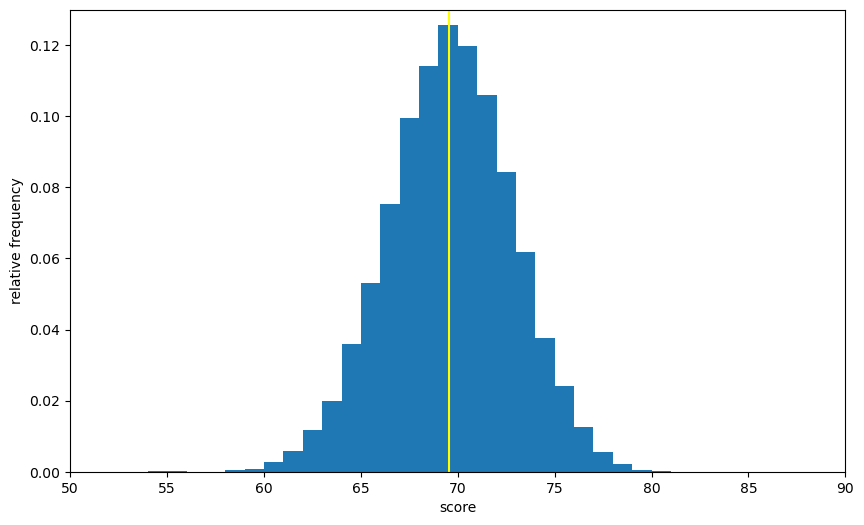

In [14]:
# 표본평균은 모평균을 중심으로 분포하는 것을 확인
# 무작위 추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 된다

sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

sample_means

fig = plt.figure(figsize = (10, 6))

plt.hist(sample_means, bins = 100, range = (0, 100), density = True)

# 모평균을 세로선으로 표시

plt.vlines(np.mean(scores), 0, 1, 'yellow')
plt.axis([50, 90, 0, 0.13])
plt.xlabel('score')
plt.ylabel('relative frequency')

plt.show()

확률의 수학적 정의와 의미
- 표본공간 과 확률표본
 * 확률표본 또는 표본은 풀고자 하는 문제에서 발생할 수 있는 하나의 현상 혹은 선택될 수 있는 하나의 경우를 말한다.
 * 표본공간은 가능한 모든 표본의 집합을 말하며 고려하는 범위에서 어떤 표본(경우, 현상)이 가능하고 어떤 표본이 가능하지 않은가를 정의하는 작업. 표본공간 = {H,T}, (표본 : H(동전의 앞면), T(동전의 뒷면))
 * 사건은 표본공간의 부분집합, 즉 전체 표본공간 중에서 관심을 가지는 일부 표본의 집합
 
확률
- 확률이란 사건(부분집합)을 입력하면 숫자(확률값)가 출력되는 함수
- 모든 각각의 사건(부분집합)에 어떤 숫자를 할당하는 함수
- 확률은 표본이 아닌 사건을 입력으로 가지는 함수

확률의 의미
- 빈도주의 관점 : 반복적으로 선택된 표본




이 사건(부분집합) A의 원소가 될 경향. 동전을 던져 앞면이 나오는 사건의 확률값은 0.5
- 베이지안 관점 : 선택된 표본이 특정한 사건(부분집합)에 속한다는 가설,명제 혹은 주장의 신뢰도로 반복이라는 개념은 사용되지 않음. 새가 날수 있는 가능성은 95%. '앞면이 나왔다'는 주장의 신뢰도가 0.5%
 * 베이지안 확률론에서 사건이 일어났다 혹은 발생했다하는 말은 그 사건의 원소 중에 정말로 선택된 표본이 있다는 사실을 알게 되었다는 것을 말한다.
 
확률의 성질
- 공집합의 확률 : 공집합인 사건의 합은 0이다. P(0) = 0
- 여집합의 확률 : 어떤 사건의 여집합인 사건의 확률은 1 - 원래 사건의 확률 과 같다.
- 포함-배제 원리 : 두 사건의 합집합의 확률은 각 사건의 확률의 합에서 두 사건의 교집합의 확률을 뺀 것과 같다.
- 전체 확률의 법칙 : 생일이 1월인 남자라는 사건의 확률과 생일이 2월인 남자라는 사건의 확률, 이외에도 각각의 월을 생일로 가지는 남자라는 사건들의 확률을 모두 합하면 남자라는 사건의 확률이 된다. 각각의 월에 있는 남자의 생일이 서로 공통 원소가 없음

확률분포함수
- 확률이 어디에 어느 정도 분포되어 있는지를 수학적으로 명시하고 전달하는 도구
- 만약 표본의 개수가 무한하다면 현실적으로 모든 사건을 하나 하나 기술하는 것은 불가능하며 확률분포함수를 이용하여 이 문제를 해결
 * 확률질량함수 : 유한 개의 사건이 존재하는 경우 각 단수사건에 대한 확률만 정의하는 함수
 * 누적분포함수 : 시작점을 모두 또같이 음의 무한대로 통일한 특수한 구간을 사용하는 사건의 확률분포를 묘사하는 함수
 * 확률밀도함수 : 누적분포함수를 미분하여 구한 도함수를 의미하며 특정한 구간의 확률이 다른 구간에 비해 상대적으로 얼마난 높은가를 나타내는 것이며 그 값 자체가 확률은 아니다.

확률변수
 - 확률적인 숫자 값을 출력하는 변수
 

#### 추측통계
확률을 사용하여 모집단의 통계적 성질을 추측하는 기법

[모집단 분포와 표본분포]  

- 모집단: 어떤 통계적 실험의 대상이 되는 모든 대상물. ex. 대한민국 모든 남성의 키 데이터, 2018 수능점수 데이터
- 모집단 분포: 모집단은 데이터 집단이므로 어떠한 분포를 이루며 이 데이터가 이루는 확률 분포가 모집단 분포
- 모수: 모집단의 특성을 나타내는 수치로 모평균,모분산,모표준편차,모비율,모상관관계 등  
  수능점수 전체데이터를 알고 싶은 것이 아니라 전체 수능점수 평균, 표준편차를 알고 싶어한다.
  수능점수와 달리 일반적으로 대부분의 모집단 분포는 완전하게 알려진 것이 없으며 전수조사는 경제적, 공간적, 시간적 제약으로 인해 거의 불가능
- 표본: 모집단의 모수(특성)을 알기 위하여 표본을 추출해서 모집단의 모수를 추정
- 확률표본:  모집단을 구성하는 모든 구성원이 표본으로 뽑힐 확률을 동일하게 하여 추출한 표본. Random이란 무작위라는 의미로, 어떠한 의도를 가지지 않는다는 것을 의미하며, 모든 구성원이 뽑힐 확률이 동일하다는 개념. 
- 통계량: 확률표본의 특성을 설명하는 값으로 표본평균, 표본분산, 표본표준편차, 표본비율, 표본상관관계 등  
  모수는 모집단이 변하지 않기 때문에 그 값이 변하지 않으나 통계량은 표본을 어떻게 추출하느냐에 따라서 그 값이 다르게 나타난다.
- 확률변수: 무작위 실험을 했을 때 특정 확률로 발생하는 각각의 결과를 수치값으로 표현한 변수. 동전의 앞과 뒤
- 확률분포: 확률변수 X의 모든 값과 그 에 대응하는 확률값들의 분포. 동전의 앞 0.5, 뒤 0.5 
- 무작위로 표본 30개씩 반복해서 100번 추출하면 100번 추출한 표본 30개의 평균값들을 100개 구할 수 있다. 추출된 표본들의 각 평균값들에 대한 발생 분포를 그려보면 특정 확률변수에 대응하는 확률을 가진 확률 분포를 그릴 수 있다. 이것을 통계량의 확률분포라고 할 수 있고 이를 표본분포라고 부른다. 
- 통계량이 확률 변수라는 의미: 확률변수의 확률분포가 수학적으로 설명가능한 분포(예, 정규분포)를 따른다고 하면 특정 확률변수와 확률함수를 알고 있다면 특정 사건이 일어날 확률을 계산할 수 있으며 더 나아가 모수와 통계량의 관계를 알고 있다면 그것을 통해 모수에 대한 통계적인 추정을 할 수 있다. 즉 통계량의 확률 함수 또는 표본 분포를 안다고 가정하면 이를 이용해 모수를 추정할 수 있다. 

[표본통계량 성질]

- 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.
- 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐. 샘플사이즈를 크게 하면 흩어짐이 적은 신뢰할 수 있는 표본평균을 얻을 수 있다.
- 표준오차는이론상 표본평균의 표준편차 크기인데 샘플사이즈가 커지면 표준오차는 작아짐
- 모분산은 0.64, 표본분산의 평균값은 0.575로 분산이 과소평가되어짐 -> 불편분산을 사용, 편향을 제거(ddof =1)
- 샘플사이즈가 커질수록 불편분산은 모분산(0.64)에 가까워짐
- 불편성 : 추정량의 기댓값이 진짜 모수(모집단의 파라미터)가 되는 특성. 편향이 없는 추정량
- 일치성 : 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
- 표본평균과 불편분산은 둘다 불편성을 가지고 있다고 할 수 있다.
- 샘플사이즈를 크게 하면 표본평균은 모평균에 가까워지고 불편분산은 모분산에 가까워지므로 일치성을 가짐
- 큰수의 법칙 : 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙
- 중심극한정리 : 모집단분포가 무엇이든지간에 샘플사이즈가 커지면 표본 평균들이 이루는 분포가 모집단의 평균μ, 표준편차σ/sqrt(n)인 정규분포에 가까워진다는 정리  
  https://drhongdatanote.tistory.com/57 

[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [15]:
# 평균이 4 표준편차가 0.8인 정규분포에서 10개의 샘플을 추출

from scipy import stats

population = stats.norm(loc = 4, scale = 0.8)
population.rvs(size = 10)

array([4.25907668, 3.81129492, 4.1682801 , 4.49287702, 3.94545704,
       3.24137502, 4.80333736, 3.33394218, 4.4282408 , 4.75078816])

In [16]:
# 표본평균

sample_mean_array = np.zeros(10000)

for i in range(10000) :
    
    sample_mean_array[i] = population.rvs(size = 10).mean()

sample_mean_array[: 10]

array([4.05756412, 3.88175346, 4.20317478, 3.96111418, 4.4078816 ,
       4.09122953, 4.46145047, 4.10667946, 4.24373608, 3.96417073])

In [17]:
# 표본평균의 평균

sample_mean_array.mean().round(2)

4.0

In [18]:
# 표본 평균의 표준편차 

sample_mean_array.std(ddof = 1).round(2)

0.25

<AxesSubplot:ylabel='Count'>

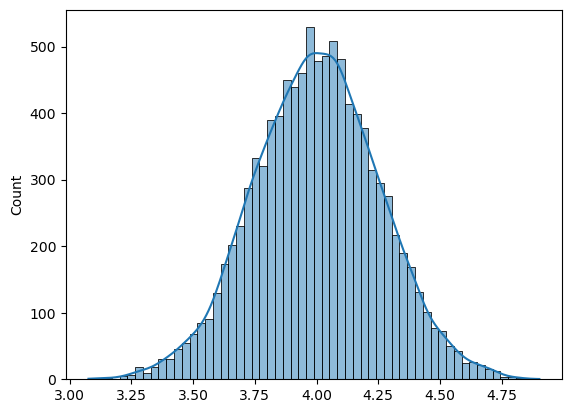

In [19]:
sns.histplot(sample_mean_array, kde = True)

In [20]:
# 샘플 사이즈 변환

size_array = np.arange(10, 100100, 100)
len(size_array)

1001

In [21]:
sample_mean_array_size = np.zeros(len(size_array))
len(sample_mean_array_size)

1001

In [22]:
# 샘플사이즈를 변화시키면서 표본 평균을 도출하는 시뮬레이션

np.random.seed(1)

for i in range(0, len(size_array)) :
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

sample_mean_array_size[: 10]

array([3.92228729, 4.0383612 , 4.09185254, 4.01346562, 4.0047295 ,
       4.05765729, 3.98466861, 3.99126955, 3.98909837, 4.03638272])

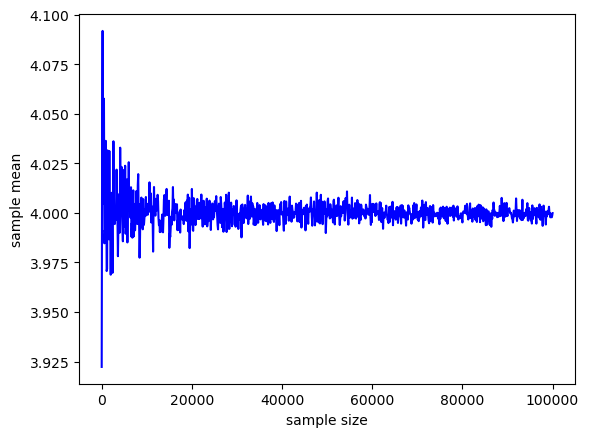

In [23]:
plt.plot(size_array, sample_mean_array_size, color = 'b')

plt.xlabel('sample size')
plt.ylabel('sample mean')

plt.show()

In [24]:
# 사용자 함수(표본 평균 계산)

def cal_sample_mean(size, n_trial) :
    sample_mean_array = np.zeros(n_trial)
    
    for i in range(n_trial) :
        sample_mean_array[i] = population.rvs(size = size).mean()
    
    return sample_mean_array

np.mean(cal_sample_mean(size = 10, n_trial = 10000))

4.001728724963021

### 과제2 

상기 사용자 함수를 사용하여 샘플사이즈가 10, 20, 30이고 샘플 갯수가 각각 10000 개인 3개의 데이터프레임을 생성 후 결합한 후 바이올린 플롯을 그려서 인사이트를 기술하세요.

          0         1         2
0  3.951767  3.912832  3.993375
1  3.869863  3.922584  3.995990
2  4.493797  4.020504  3.817149
3  3.711682  3.709585  4.031103
4  3.663951  3.904739  4.002389
sample_mean_array    4.002618
dtype: float64
sample_mean_array    4.001078
dtype: float64
sample_mean_array    4.000625
dtype: float64
0    4.002618
1    4.001078
2    4.000625
dtype: float64 

sample_mean_array    0.252302
dtype: float64
sample_mean_array    0.17933
dtype: float64
sample_mean_array    0.145183
dtype: float64
0    0.252302
1    0.179330
2    0.145183
dtype: float64


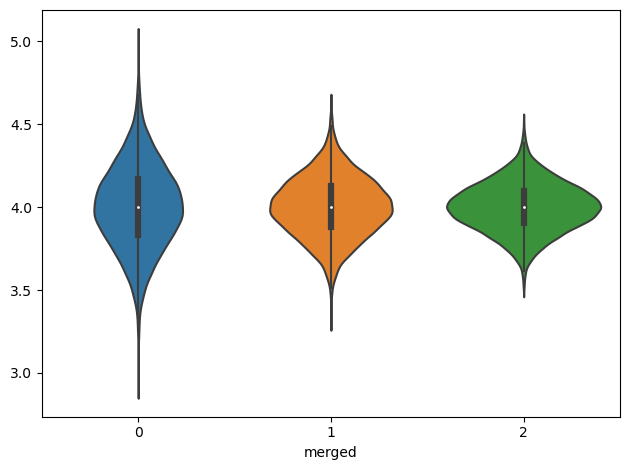

In [25]:
from scipy import stats

np.random.seed(1)

population = stats.norm(loc = 4, scale = 0.8)
sample = population.rvs(size = 10000)

# 사용자 함수

def cal_sample_mean(size, n_trial) :
    sample_mean_array = np.zeros(n_trial)
    
    for i in range(n_trial) :
        sample_mean_array[i] = population.rvs(size = size).mean()
    
    return sample_mean_array

sample1 = cal_sample_mean(10, 10000)
sample2 = cal_sample_mean(20, 10000)
sample3 = cal_sample_mean(30, 10000)

df1 = pd.DataFrame({'sample_mean_array' : sample1})
df2 = pd.DataFrame({'sample_mean_array' : sample2})
df3 = pd.DataFrame({'sample_mean_array' : sample3})

merged_df = pd.concat([df1, df2, df3], axis = 1, ignore_index = True)
print(merged_df.head())

print(df1.mean())
print(df2.mean())
print(df3.mean())
print(merged_df.mean(), '\n')

print(df1.std())
print(df2.std())
print(df3.std())
print(merged_df.std())

# fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15))

# ax1 = sns.violinplot(data=df1, y='sample_mean_array', ax = ax[0, 0])
# ax1.set_xlabel ('sample1')

# ax2 = sns.violinplot(data=df2, y='sample_mean_array', ax = ax[0, 1])
# ax2.set_xlabel ('sample2')

# ax3 = sns.violinplot(data=df3, y='sample_mean_array', ax = ax[1, 0])
# ax3.set_xlabel ('sample3')


ax4 = sns.violinplot(data = merged_df)
ax4.set_xlabel ('merged')

# ax5 = sns.violinplot(data = sample, ax = ax[2, 0])
# ax5.set_xlabel ('population')

# ax[2, 1].axis('off')

plt.tight_layout()
plt.show()

In [26]:
# 정규 분포의 확률 밀도 계산

stats.norm.pdf(loc = 4, scale = 0.8, x = 4) # pdf : 확률밀도 함수

0.49867785050179086

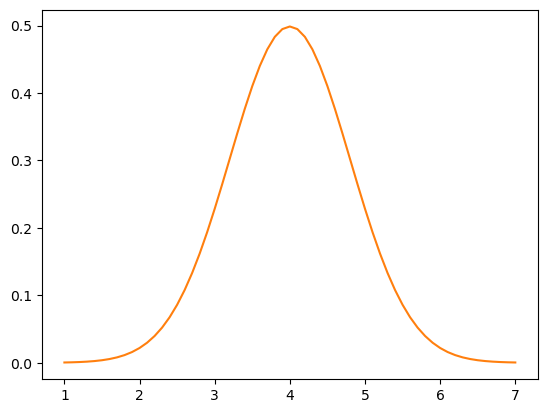

In [27]:
x_plot = np.arange(1, 7.1, 0.1)

plt.plot(x_plot, stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8), color = 'C1')

plt.show()

In [28]:
# 동일 확률 밀도 함수에서 x = 3 일 때의 확률을 구하세요

norm_dist = stats.norm(loc = 4, scale = 0.8)

norm_dist.pdf(x = 3)

0.2283113567362774

stats.norm.cdf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 누적분포함수(Cumulative Distribution Function, CDF) 값을 계산하는 함수입니다. 
- 정규분포의 누적분포함수는 특정 값보다 작거나 같은 확률을 나타내는데, 이를 통해 특정 값의 분위수를 계산할 수 있습니다.

- stats.norm.cdf(x, loc=0, scale=1) 형태로 사용하며, x는 계산하고자 하는 분위수를 나타내는 값입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

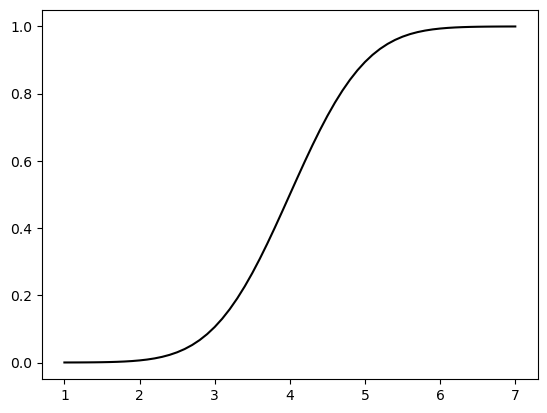

In [29]:
# 누적 분포 함수

x_plot = np.arange(1, 7.1, 0.1)

plt.plot(x_plot, stats.norm.cdf(x = x_plot, loc = 4, scale = 0.8), color = 'black') # 누적분포함수

plt.show()

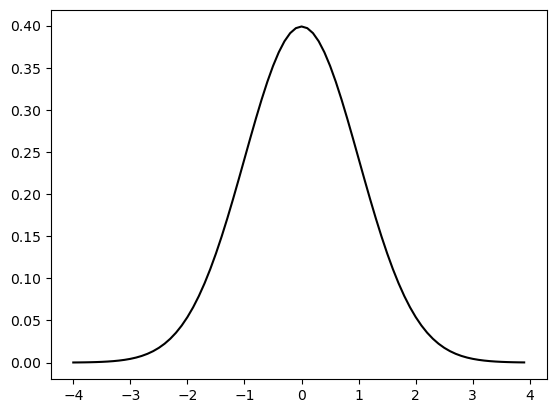

In [30]:
x_plot = np.arange(-4, 4, 0.1)

stats.norm.cdf(x = 0)

plt.plot(x_plot, stats.norm.pdf(x = x_plot, loc = 0, scale = 1), color = 'black') # 누적분포함수

plt.show()

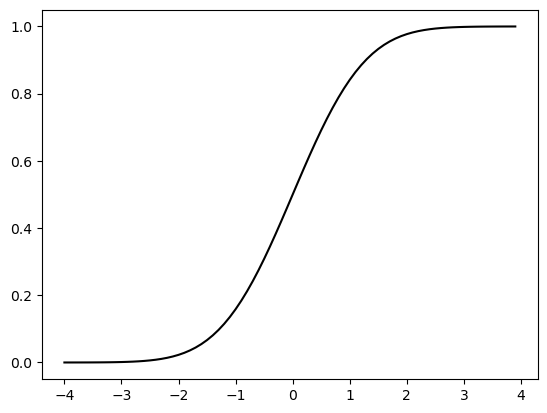

In [31]:
x_plot = np.arange(-4, 4, 0.1)

stats.norm.cdf(x = 0) # 하측확률

plt.plot(x_plot, stats.norm.cdf(x = x_plot, loc = 0, scale = 1), color = 'black') # 누적분포함수

plt.show()

In [32]:
# 평균이 5 표준 편차가 2인 저규 분포에서 3이하의 확률 계산

a = stats.norm(loc = 5, scale = 2)

a.cdf(x = 3)

0.15865525393145707

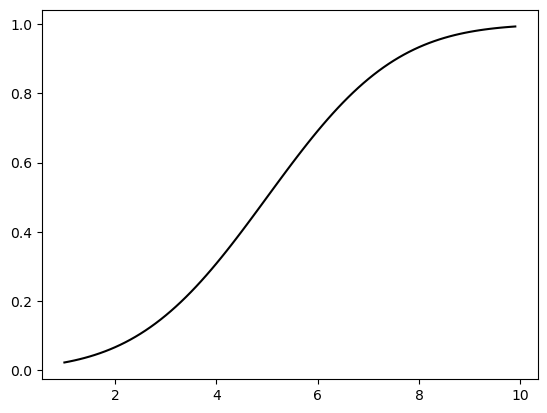

In [33]:
x_plot = np.arange(1, 10, 0.1)

plt.plot(x_plot, stats.norm.cdf(x = x_plot, loc = 5, scale = 2), color = 'black')

plt.show()

stats.norm.ppf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 분위수(Percent Point Function, PPF) 값을 계산하는 함수입니다. 
- 정규분포의 분위수는 특정 확률을 가지는 값(또는 그보다 작은 값)을 계산할 수 있습니다.
- stats.norm.ppf(q, loc=0, scale=1) 형태로 사용하며, q는 계산하고자 하는 확률값을 나타내는 실수입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

In [34]:
from scipy.stats import norm

x = norm.ppf(0.8, loc = 5, scale = 2)

x

6.683242467145829

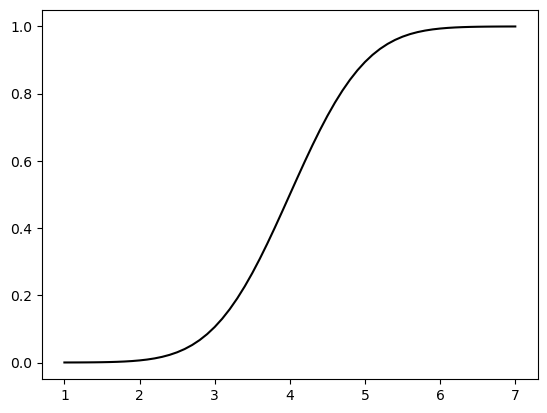

In [35]:
# 평균이 4 표준편차 0.8 이 정규분포 해서 확률이 0.5일때 분위수 값을 계산하세요

x = norm.ppf(0.5, loc = 4, scale = 0.8)

x_plot = np.arange(1, 7.1, 0.1)

plt.plot(x_plot, stats.norm.cdf(x_plot, loc = 4, scale = 0.8), color = 'black')

#### 자유도
- 통계량이란, 특정한 표본에서 계산되는 어떤 수치를 말합니다. 예를 들어, 표본의 평균이나 분산 등이 통계량이 될 수 있습니다. 이때, 표본의 크기가 작아질수록 통계량을 계산할 때, 계산에 사용되는 데이터의 수가 줄어들기 때문에, 계산에 대한 제약이 더욱 커집니다.
- 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 자유도(degree of freedom)라고 합니다. 자유도가 크면 큰 값, 작으면 작은 값이 나올 수 있고, 이에 따라서 추정 결과가 바뀔 수 있습니다.
- 자유도란, 통계학에서 모집단의 분포를 추정하거나 가설 검정을 할 때, 적게는 1개, 많게는 여러 개의 표본으로부터 통계량을 계산할 때, 표본의 자유도를 말합니다. 간단하게 말하면, 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 의미합니다. 이는 분석하고자 하는 문제나 실험의 특성에 따라 달라지며, 모집단의 분산 추정량을 계산할 때 등 다양한 상황에서 사용됩니다.
- 어떤 학급의 수학시험에서, 20명의 학생들이 시험을 보았고, 각 학생들의 점수를 알고 있다고 가정해봅시다. 이때, 평균 점수를 계산하기 위해서는 각 학생의 점수를 모두 더한 후, 학생 수로 나누면 됩니다. 이때, 평균 점수를 계산할 때는 자유도가 n-1이 됩니다. 이는 계산에 사용되는 데이터의 수(20)에서 1을 뺀 값이기 때문입니다. 따라서, 평균 점수를 계산할 때, 각 학생의 점수를 자유롭게 지정할 수 있는 정도가 n-1만큼 되는 것입니다.
- 이와 같이, 자유도는 계산에 사용되는 데이터의 수에 따라서 결정되며, 데이터의 수가 적을수록 자유도는 작아지게 됩니다. 따라서, 작은 자유도를 가진 경우에는 계산에 대한 제약이 더욱 커지게 되므로, 이를 고려하여 적절한 분석 방법을 선택해야 합니다.

t 분포란

- 일반적으로 여러 실험을 해보면 데이터가 평균 근처에 많이 분포하고 평균에서 멀어질수록 적게 분포하는 형태를 띄는 정규분포를 띄는 경우가 많다.그런데 정규분포는 표본의 수가 적으면 신뢰도가 낮아진다

- 신뢰도를 높이기 위하여 표본을 많이 뽑으면 되지만 현실적으로 시간과 비용의 제약으로 한계가 있으며 이에 대한 대응책으로 정규분포보다 한 단계 예측 범위가 넓은 분포를 사용하는게 바로 t분포이다

- t 분포는 정규분포의 표준정규분포처럼 표준이 되는 그래프는 없으며 대신 표본의 수에 따라서 그래프의 모양이 변하며 표본의 수가 많아질수록 점점 표준 정규분포와 비슷해지고 표본의 수가 적어질수록 그래프는 점점 옆으로 퍼진다 

- t 분포는 확률을 구하는 겨우 보다는 신뢰 구간 혹은 가설 검정에 주로 사용하는데 특히 표본이 수가 30개 미만일때 정규분포 대신 예측범위가 넓은 t분포를 사용한다 표본의 수가 30개 이상이면 정규분포와 비슷해지기 때문에 정규분포를 사용하는 것이 바람직하다.


- t 분포로 신뢰구간을 추정하고 가설검정을 할 때 t 값을 알아야 하는데 t 값은 x 축 좌표이다- t-값은 t-분포에서의 값으로, 일반적으로 표본 평균과 모집단 평균의 차이를 표준 오차로 나눈 값입니다. t-값은 표본에서 계산된 통계량으로, 이를 바탕으로 모집단의 특성에 대한 가설을 검증하고, 모집단에 대한 추론을 수행
- t-값은 해당 표본이 모집단과 얼마나 다른지, 혹은 모집단과 유사한지 등을 파악하는 데 사용됩니다. t-값이 크다는 것은 표본과 모집단이 서로 매우 다르다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표하지 못할 가능성이 높습니다. 반면, t-값이 작다는 것은 표본과 모집단이 서로 유사하다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표할 가능성이 높습니다.
-  t-값은 가설 검정에서 중요한 역할을 합니다. 예를 들어, 표본을 사용하여 모집단의 평균이 어떤 값과 차이가 있는지를 검정할 때, t-값을 사용하여 가설 검정을 수행합니다. 이를 통해, 모집단에 대한 가설이 기각되는 경우, 해당 모집단과 표본 간에 차이가 있다는 것을 의미하며, 가설이 채택되는 경우, 해당 모집단과 표본 간에 차이가 없다는 것을 의미합니다.

t분포는 
- 통계학에서 가설 검정과 신뢰구간 추정에 사용되는 분포입니다. t분포는 정규분포와 유사하지만, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있도록 고안된 분포입니다. 표본의 크기가 커질수록 t분포는 정규분포에 수렴하게 됩니다.
- t분포를 사용하는 이유는 크게 두 가지로 나뉩니다. 첫째, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있습니다. 둘째, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다. 모집단의 분산을 알지 못할 때는 t분포를 이용하여 검정을 하며, 이 경우에는 검정통계량에 대한 검정력이 낮아질 수 있습니다.
- 아래는 t분포를 사용하는 예시입니다.
  - 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다고 가정해봅시다. 이 경우, 각각의 신약에 대한 효과를 비교하기 위해서는 t-검정(t-test)을 사용할 수 있습니다. t-검정은 두 집단의 평균값이 서로 다른지를 검정하는 방법으로, 검정통계량 t를 계산하여 유의수준(alpha)과 비교하여 검정을 수행합니다. 
  - 만약 검정결과 t값이 양의 값이라면, 첫 번째 집단의 평균값이 더 크다는 것을 의미하며, 음의 값이라면 두 번째 집단의 평균값이 더 크다는 것을 의미합니다. 검정통계량 t는 자유도(n-1)을 가진 t분포를 따르게 됩니다. 따라서, 이 경우 t분포를 이용하여 검정통계량 t에 대한 유의확률(p-value)을 계산할 수 있습니다.

이와 같은 방식으로, t분포를 이용하여 작은 표본의 경우에도 정확한 검정 결과를 얻을 수 있으며, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다.

In [42]:
# t_value 는 일반적으로 표본 평균과 모집단 평균의 차이를 표준 오차로 나눈 값으로 계산

sample_data = [2.3, 3.5, 1.8, 4.1, 2.7]
sample_mean = sum(sample_data) / len(sample_data) #  표본 평균 계산
sample_std = stats.tstd(sample_data) # 표본표준편차 계산
pop_mean = 3.0 # 모집단 평균 가정
t_value = (sample_mean - pop_mean) / (sample_std / len(sample_data) ** 0.5)

t_value

-0.2907009498669058

In [59]:
sample_data = [2.3, 3.5, 1.8, 4.1, 2.7]

sample_mean = np.mean(sample_data)
sample_std = stats.tstd(sample_data)
pop_mean = 3.0

t_value = (sample_mean - pop_mean) / (sample_std / np.sqrt(len(sample_data)))

t_value

-0.2907009498669058

In [37]:
# t 값의 표본분포

np.random.seed(0)

t_value_array = np.zeros(10000)

norm_dist = stats.norm(loc = 4, scale = 0.8)

for i in range(0, 10000) :
    sample = norm_dist.rvs(size = 10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)
    sample_se = sample_std / np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

<AxesSubplot:ylabel='Density'>

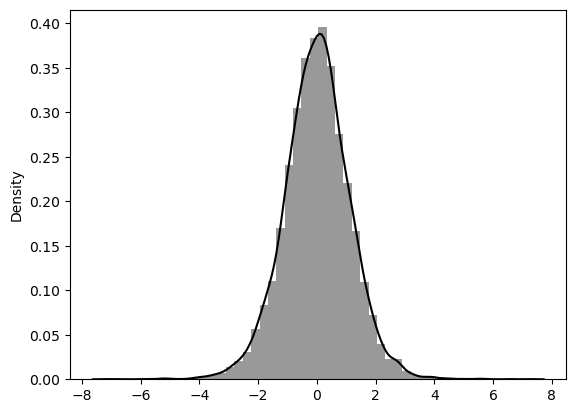

In [38]:
import warnings

warnings.filterwarnings('ignore')

sns.distplot(t_value_array, color = 'black')

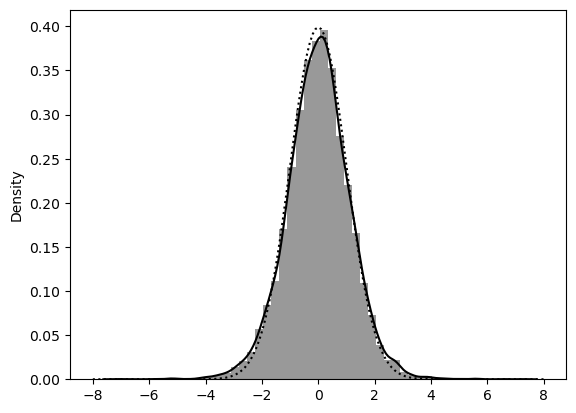

In [39]:
sns.distplot(t_value_array, color = 'black')

x = np.arange(-8, 8.1, 0.1)
plt.plot(x, stats.norm.pdf(x = x), color = 'black', linestyle = 'dotted')

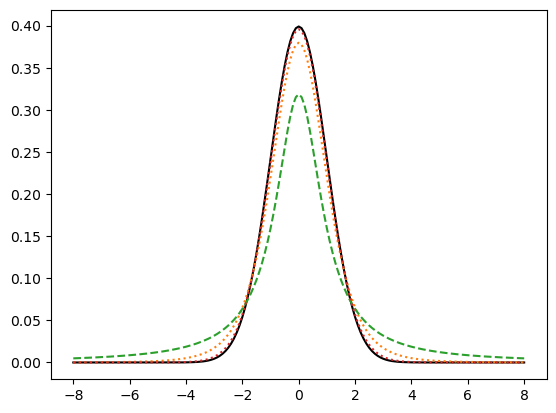

In [40]:
# 자유도 n이 커짐에 따라 표준정규분포 N(0, 1) 에 수렴

plt.plot(x, stats.norm.pdf(x = x), color = 'black')

plt.plot(x, stats.t.pdf(x = x, df = 5), color = 'C1', linestyle = 'dotted')

plt.plot(x, stats.t.pdf(x = x, df = 1), color = 'C2', linestyle = '--')

plt.plot(x, stats.t.pdf(x = x, df = 30), color = 'C3', linestyle = ':')

plt.show()